## Connect to mysql databse

In [1]:
#connect to mysql 

import pymysql
import pandas as pd

In [11]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
#initialize the attributes 
#for security reason the password is not display so the connection cannot be established 

db_name = "project1"
db_host = "localhost"
db_username = "root"
db_password = "**"


In [3]:
try:
    conn=pymysql.connect(host=db_host,
                        port=int(3306),
                        user="root",
                        passwd=db_password,
                        db=db_name)
    
except e:
    print(e)

In [4]:
if conn:
    print("Successful Connected")
else:
    print("Error")

Successful Connected


## Database tables

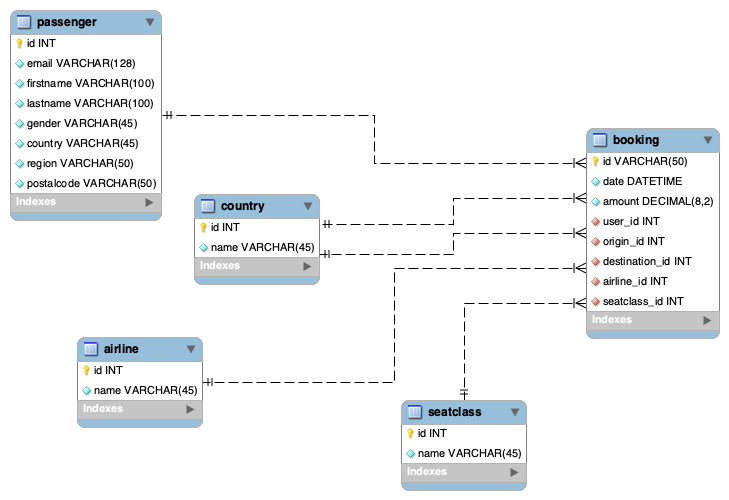

In [18]:
from IPython.display import Image
Image(filename='/Users/liyenglee/Downloads/flight_sql.png')

In [12]:
booking = pd.read_sql_query("SELECT * FROM booking", conn)
booking

,id,date,amount,user_id,origin_id,destination_id,airline_id,seatclass_id
0,AA4052,2015-04-04,518.44,704,4,9,2,3
1,AA6951,2015-09-13,2538.04,479,8,16,4,2
2,AB0213,2017-03-16,1341.86,662,1,6,5,1
3,AB0730,2017-12-11,2720.03,144,18,11,3,2
4,AE0845,2017-12-04,1833.17,707,7,23,6,1
...,...,...,...,...,...,...,...,...
995,ZY2365,2017-08-18,885.54,317,6,13,7,3
996,ZZ1577,2017-10-14,233.89,358,15,14,7,4
997,ZZ2426,2015-04-09,2087.99,841,12,1,1,2
998,ZZ6782,2016-07-17,2633.42,797,3,20,1,2


In [13]:
airline = pd.read_sql_query("SELECT * FROM airline", conn)
airline

,id,name
0,1,EasyJet
1,2,American Airlines
2,3,Iberia
3,4,Delta Airlines
4,5,Lufthansa
5,6,Air France
6,7,RyanAir
7,8,Vueling


In [14]:
country = pd.read_sql_query("SELECT * FROM country", conn)
country

,id,name
0,1,Canada
1,2,Mexico
2,3,Germany
3,4,Russia
4,5,Thailand
5,6,United Kingdom
6,7,Spain
7,8,USA
8,9,Chile
9,10,Singapur


In [15]:
passenger = pd.read_sql_query("SELECT * FROM passenger", conn)
passenger

,id,email,firstname,lastname,gender,country,region,postalcode
0,1,hocuddie0@yandex.ru,Harper,O'Cuddie,Male,Germany,Baden-Wurttemberg,76199000000
1,2,szelner1@liveinternet.ru,Sigrid,Zelner,Female,France,Pays de la Loire,44019CEDEX1
2,3,hhaddy2@addthis.com,Harcourt,Haddy,Male,France,Ile-de-France,91309CEDEX
3,4,ddikle3@businessinsider.com,Dion,Dikle,Female,France,Ile-de-France,75954CEDEX1
4,5,pfinder4@ebay.co.uk,Pascale,Finder,Male,United Kingdom,England,DL10
...,...,...,...,...,...,...,...,...
995,996,bbeavesrn@homestead.com,Ban,Beaves,Male,France,Languedoc-Roussillon,34299CEDEX5
996,997,gmenezesro@businessinsider.com,Graham,Menezes,Male,Germany,Bayern,97078000000
997,998,ddraysonrp@amazon.co.jp,Desmund,Drayson,Male,France,Ile-de-France,78942CEDEX
998,999,cmaliarq@reddit.com,Carey,Malia,Female,Spain,Murcia,30005000000


In [16]:
seatclass = pd.read_sql_query("SELECT * FROM seatclass", conn)
seatclass

,id,name
0,1,First Class
1,2,Grand Class
2,3,Business
3,4,Economy


## Queries

### Popular Airlines and Seat Classes:

Which airlines are the most popular among customers?

In [20]:
sql_query = """
SELECT project1.booking.airline_id, SUM(project1.booking.amount) AS total_amount, project1.airline.name
FROM project1.booking 
LEFT JOIN project1.airline ON project1.booking.airline_id = project1.airline.id
GROUP BY project1.booking.airline_id, project1.airline.name
ORDER BY total_amount DESC
LIMIT 5;
"""

# Execute the query and store the results in a DataFrame
top_airlines = pd.read_sql_query(sql_query, conn)
top_airlines


,airline_id,total_amount,name
0,1,195180.52,EasyJet
1,3,191999.81,Iberia
2,2,190048.69,American Airlines
3,5,187436.68,Lufthansa
4,8,179235.07,Vueling


Which seat classes are preferred by customers?

In [23]:
sql_query = """
SELECT project1.booking.seatclass_id, COUNT(project1.booking.id) AS total_booking, SUM(project1.booking.amount) AS total_amount, project1.seatclass.name
FROM project1.booking 
LEFT JOIN project1.seatclass ON project1.booking.seatclass_id = project1.seatclass.id
GROUP BY project1.booking.seatclass_id, project1.seatclass.name
ORDER BY total_booking DESC
LIMIT 5;
"""

top_seatclass = pd.read_sql_query(sql_query,conn)
top_seatclass

,seatclass_id,total_booking,total_amount,name
0,2,356,819720.52,Grand Class
1,1,354,483612.08,First Class
2,3,180,123225.82,Business
3,4,110,35176.72,Economy


### Busiest Travel Periods:
What are the busiest months in terms of bookings?



In [25]:
sql_query = """
SELECT MONTH(date) AS month, COUNT(*) AS month_count
FROM project1.booking
GROUP BY month
ORDER BY month_count desc
LIMIT 5;
"""

busiest_months = pd.read_sql_query(sql_query,conn)
busiest_months

,month,month_count
0,6,96
1,5,90
2,8,89
3,9,88
4,12,88


### Top Origin and Destination Locations:
Which countries are the most popular as origins and destinations for flights?



In [26]:
sql_query = """
SELECT project1.booking.origin_id, COUNT(*) AS total_booking, project1.country.name
FROM project1.booking 
LEFT JOIN project1.country ON project1.booking.origin_id = project1.country.id
GROUP BY project1.booking.origin_id, project1.country.name
ORDER BY total_booking DESC
LIMIT 5;
"""

popular_origins = pd.read_sql_query(sql_query,conn)
popular_origins

,origin_id,total_booking,name
0,8,98,USA
1,7,83,Spain
2,2,70,Mexico
3,16,62,Italy
4,17,56,France


In [27]:
sql_query = """
SELECT project1.booking.destination_id, COUNT(*) AS total_booking, project1.country.name
FROM project1.booking 
LEFT JOIN project1.country ON project1.booking.destination_id = project1.country.id
GROUP BY project1.booking.destination_id, project1.country.name
ORDER BY total_booking DESC
LIMIT 5;
"""

popular_destinations = pd.read_sql_query(sql_query,conn)
popular_destinations

,destination_id,total_booking,name
0,11,77,Norway
1,6,75,United Kingdom
2,14,71,Netherlands
3,7,71,Spain
4,16,68,Italy


What are the most popular routes?

In [29]:
sql_query = """
SELECT COUNT(*) AS total_booking,
       origin_country.name AS origin_name, destination_country.name AS destination_name
FROM project1.booking 
LEFT JOIN project1.country AS origin_country ON project1.booking.origin_id = origin_country.id
LEFT JOIN project1.country AS destination_country ON project1.booking.destination_id = destination_country.id
GROUP BY project1.booking.origin_id, project1.booking.destination_id, origin_name, destination_name
ORDER BY total_booking DESC
LIMIT 5;
"""

popular_routes = pd.read_sql_query(sql_query,conn)
popular_routes

,total_booking,origin_name,destination_name
0,15,USA,Norway
1,13,USA,United Kingdom
2,12,Mexico,USA
3,11,Spain,USA
4,10,USA,Italy


### Custoner information
What is the gender distribution of customers?

In [30]:
sql_query = """
SELECT project1.passenger.gender, COUNT(*) AS total_booking
FROM project1.booking 
LEFT JOIN project1.passenger ON project1.booking.user_id = project1.passenger.id
GROUP BY project1.passenger.gender
ORDER BY total_booking DESC
LIMIT 5;
"""

gender = pd.read_sql_query(sql_query,conn)
gender

,gender,total_booking
0,Male,518
1,Female,482


Where are the top 5 countries the customers are from?

In [31]:
sql_query = """
SELECT project1.passenger.country, COUNT(*) AS total_booking
FROM project1.booking 
LEFT JOIN project1.passenger ON project1.booking.user_id = project1.passenger.id
GROUP BY project1.passenger.country
ORDER BY total_booking DESC
LIMIT 5;
"""
top_countries= pd.read_sql_query(sql_query,conn)
top_countries

,country,total_booking
0,France,722
1,Netherlands,87
2,Germany,67
3,Spain,51
4,United Kingdom,37


Where are the top 5 regions the customers are from?

In [32]:
sql_query = """
SELECT project1.passenger.region, COUNT(*) AS total_booking
FROM project1.booking 
LEFT JOIN project1.passenger ON project1.booking.user_id = project1.passenger.id
GROUP BY project1.passenger.region
ORDER BY total_booking DESC
LIMIT 5;
"""
top_regions= pd.read_sql_query(sql_query,conn)
top_regions

,region,total_booking
0,Ile-de-France,227
1,Rhone-Alpes,58
2,Provence-Alpes-Cote d'Azur,55
3,Pays de la Loire,40
4,Centre,33


### Booking Amount:
What is the average booking amount?

In [33]:
sql_query = """
SELECT AVG(amount) AS average_amount
FROM project1.booking 
ORDER BY average_amount DESC
LIMIT 5;
"""
average_amount= pd.read_sql_query(sql_query,conn)
average_amount

,average_amount
0,1461.73514


What is the highest booking amount?

In [35]:
sql_query = """
SELECT b.amount AS max_amount,
       origin_country.name AS origin_name,
       destination_country.name AS destination_name,
       airline_company.name AS airline_name,
       seatclass_airline.name AS seatclass_name
FROM project1.booking AS b
LEFT JOIN project1.country AS origin_country ON b.origin_id = origin_country.id
LEFT JOIN project1.country AS destination_country ON b.destination_id = destination_country.id
LEFT JOIN project1.airline AS airline_company ON b.airline_id = airline_company.id
LEFT JOIN project1.seatclass AS seatclass_airline ON b.seatclass_id = seatclass_airline.id
WHERE b.amount = (SELECT MAX(amount) FROM project1.booking);
"""
max_amount= pd.read_sql_query(sql_query,conn)
max_amount

,max_amount,origin_name,destination_name,airline_name,seatclass_name
0,2998.81,France,Japan,Delta Airlines,Grand Class
